# **stockait**
####  Stockait is an integrated library for stock price big data learning research. All processes from data loading to preprocessing, machine learning model learning, and backtesting are possible through the stockait library.


#### This file shows the overall flow of stockait, and the process is as follows.
`Data Acquisition` - `Data Preprocessing` - `Trader Definition` - `Trader(Model) Fitting & Evaluation` - `Back Testing`

In [1]:
import pandas as pd
import os
import sys
sys.path.append("/project/stockAI/github/main/stockait")
import stockait as sai

<br> 
<br> 

# **1. Data Acquisition**
>1\) Bringing up markets by country: `sai.get_markets(country:list)`   
>2) Bringing up stocks by market: `sai.get_tickers(date:list, tickers:list=None)`    
>3) Load Data: `sai.load_data(date:list, tickers:list=None)`   

<br>

#### A total of 69 stock market data are available for stockait, and the list of available markets is as follows.

`'KOSPI', 'KOSDAQ', 'KONEX', 'PNK', 'NMS', 'NYQ', 'ASX', 'NCM', 'NGM', 'ASE', 'JKT', 'GER', 'PAR', 'TOR', 'BRU', 'OBB', 'BUE', 'LSE', 'KLS', 'PCX', 'VAN', 'AMS', 'EBS', 'TWO', 'OSL', 'STO', 'CPH', 'VIE', 'SAO', 'SES', 'NSI', 'MEX', 'HKG', 'NZE', 'MCE', 'BSE', 'ISE', 'FRA', 'MCX', 'MIL', 'MUN', 'ATH', 'BER', 'ENX', 'STU', 'LIS', 'TLV', 'DUS', 'IST', 'HAM', 'HAN', 'TAL', 'TLO', 'SET', 'TAI', 'HEL', 'ICE', 'IOB', 'CNQ', 'RIS', 'KSC', 'LIT', 'KOE', 'DOH', 'EUX', 'SHH', 'CCS', 'MDD', 'SHZ', 'MAD'`



 

<br> 

## **1) Bringing up markets by country** 
#### The `get_countries` function allows you to identify the countries that provide data in stockait.

In [2]:
check_countries = sai.get_countries()
print(check_countries)
print(len(check_countries))

['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'China', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Russia', 'Singapore', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'USA', 'United Kingdom', 'Venezuela']
41


#### If you put the desired country among the 41 countries above as a factor in the function `get_markets`, you get the corresponding market.

In [3]:
lst_markets = sai.get_markets(country='South Korea')
print(len(lst_markets), lst_markets[:5])

3 ['KOSPI', 'KOSDAQ', 'KONEX']


<br> 

## **2) Bringing up stocks by market**
#### If you list the market you want in the market factors of `get_tickers`, you can get stocks that fit the market.

In [4]:
lst_tickers = sai.get_tickers(markets=['KOSPI'])
print(len(lst_tickers), lst_tickers[:5])

920 ['095570', '006840', '282330', '027410', '138930']


<br> 

## **3) Load Data**
#### If you enter a specific item and date you want to study in the `load_data` function, all the items you enter will get integrated data for that date.

In [6]:
raw_data = sai.load_data(date=['2016-01-01', '2021-12-31'], tickers=lst_tickers, country="South Korea")
print(raw_data.shape)
raw_data.head()

100%|███████████████████████████████████████████████████████████████████████████████████| 920/920 [04:28<00:00,  3.43it/s]


(1253960, 7)


,Code,Date,Open,High,Low,Close,Volume
0,000020,2016-01-04,8130,8150,7920,8140,281440
1,000020,2016-01-05,8040,8250,8000,8190,243179
2,000020,2016-01-06,8200,8590,8110,8550,609906
3,000020,2016-01-07,8470,8690,8190,8380,704752
4,000020,2016-01-08,8210,8900,8130,8770,802330


#### The data are in the above form, consisting of stock code (Code), date (Date), market price (Open), high price (Low volume.
#### In this study example file, we will set it as a learning data set from 2017 to 2020, verification and testing dataset from 2021, and we have collected enough data from 2016 to 2021 to add auxiliary indicators.

<br> 
<br> 

# **2. Data Preprocessing**
>1\) Add Secondary Indicators: `sai.add_index(data:pd.DataFrame(), index_list:list)`   
>2) scaling: `sai.scaling(data:pd.DataFrame(), scaler_type:String, window_size:Int=None)`   
>3) Convert to time series data: `sai.time_series(data:pd.DataFrame(), day:Int=10)`

#### Data preprocessing is performed in the order of **add auxiliary indicators, standardization, and conversion to time series data**, and unwanted preprocessing can be omitted.

<br>

## **1) Add Secondary Indicators**

- Next day's closing price change rate **(subordinate variable)**   
`next_change`

- **Supplementary indicators provided by TA Package**
'MA5', 'MA20', 'MA60','MA120', 'next_change', 'ADI','CMF','VPT','VMAP', 'BHB','BLB','KCH','KCL','KCM','DCH','DCL','DCM','UI', 'SMA','EMA','WMA','MACD','VIneg','VIpos','TRIX','MI','CCI','DPO','KST','Ichimoku','ParabolicSAR','STC', 'RSI','SRSI','TSI','UO','SR','WR','AO','ROC','PPO','PVO'


#### 49 auxiliary indicators shown above can be added using the add_index function.
**(Add `next_change` set as the default dependent variable in stockait here.)**

In [ ]:
check_index = ['MA5', 'MA20', 'MA60','MA120', 
             'next_change',
             'ADI','CMF','VPT','VMAP',
             'BHB','BLB','KCH','KCL','KCM','DCH','DCL','DCM','UI',
             'SMA','EMA','WMA','MACD','VIneg','VIpos','TRIX','MI','CCI','DPO','KST','Ichimoku','ParabolicSAR','STC',
             'RSI','SRSI','TSI','UO','SR','WR','AO','ROC','PPO','PVO']

check_df = sai.add_index(data=raw_data, index_list=check_index)
check_df

In [ ]:
check_df = check_df.drop(columns=['Market'])
check_df.shape

<br> 

## **2) scaling**
#### There are four ways to standardize stock price data.

- minmax
- standard
- robust
- div-close

#### There are already well-known **minmax, standard, robust** scalers and **div-close** scalers divided by the closing price of the previous day. 

In [ ]:
check_scaled_KR = sai.scaling(data=check_df, scaler_type="div-close", window_size=None)
check_scaled_KR

#### This file uses the **div-close** method of distributing columns related to stock prices at the closing price of the previous day.

<br> 

## **3) Convert to time series data**
#### If the date predicted by the machine learning model is D0, it is a function of converting it into time series data of n days. (=> D-n-1, D-n-2, D-n-3, ..., D-3, D-2, D-1 and D0)
#### The picture shows the following. Since there are 48 columns for 10 days, there are a total of 480 independent variables.

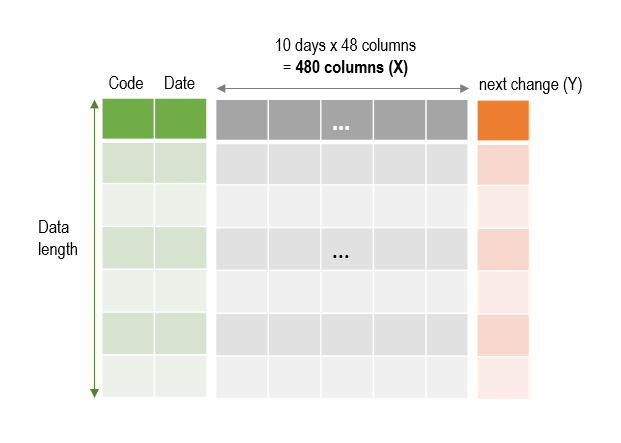

#### The following is an example code that converts D0 rlwns 10 days of time series data as shown in the figure above.

In [ ]:
df_time_series = sai.time_series(check_df, day=10)
df_time_series_scaled = sai.time_series(check_scaled_KR, day=10)
df_time_series_scaled

In [ ]:
df_time_series.to_parquet("time_series_0903.parquet", index=False)
df_time_series_scaled.to_parquet("time_series_0903_scaled.parquet", index=False)

**(If the data is too large, it stores preprocessing-applied data because it takes a very long time to preprocess the data. And it is recommended to recall and use it as shown in the cell below.)**

In [2]:
df_time_series = pd.read_parquet("time_series_0903.parquet") 
df_time_series_scaled = pd.read_parquet("time_series_0903_scaled.parquet")

df_time_series['Code'] = df_time_series['Code'].astype(str).str.zfill(6)
df_time_series_scaled['Code'] = df_time_series_scaled['Code'].astype(str).str.zfill(6)

<br> 
    
### **Separate train / validation / test dataset**

In [3]:
data = df_time_series # Data Before Scaling
data_scaled = df_time_series_scaled # Data After Scaling

# train, validation, test dataset split
train_data = data[(data['Date'] >= '2017-01-01') & (data['Date'] <= '2020-12-31')]
valid_data = data[(data['Date'] >= '2021-01-01') & (data['Date'] <= '2021-06-31')] 
test_data = data[(data['Date'] >= '2021-07-01') & (data['Date'] <= '2021-12-31')]

# train, validation, test dataset split (scaled) 
train_data_scaled = data_scaled[(data_scaled['Date'] >= '2017-01-01') & (data_scaled['Date'] <= '2020-12-31')]
valid_data_scaled = data_scaled[(data_scaled['Date'] >= '2021-01-01') & (data_scaled['Date'] <= '2021-06-31')] 
test_data_scaled = data_scaled[(data_scaled['Date'] >= '2021-07-01') & (data_scaled['Date'] <= '2021-12-31')]

print(train_data.shape, valid_data.shape, test_data.shape)
print(train_data_scaled.shape, valid_data_scaled.shape, test_data_scaled.shape)

(828290, 483) (217159, 483)
(828290, 483) (217159, 483)


#### It was divided into learning datasets from 2017 to 2020, validation datasets from June 2021, and test datasets from December 2021.

<br> 
<br>

# **3. Trader Definition**
#### Stockait is the concept of trading and uses `Trader`.
#### Learning, evaluation, and rate-of-return simulation of artificial intelligence models are all carried out through this `Trader`.
#### Therefore, if the data is all ready, `Trader` should be defined first.

**(You can find more information about Trader in the file `tutorials/01.trader_definition.ipynb`)**

In [4]:
# List containing trader objects 
# You can put a bunch of traders in here, and you can trade at once. 
# See 'tutorials/01.trader_definition.ipynb' for a detailed example.
lst_trader = [] 

In [5]:
from lightgbm import LGBMClassifier

# conditional_buyer: Object that determines acquisition based on data filtering conditions 
b1_lg = sai.ConditionalBuyer()

def sampling1(df): # Create a conditional function
    condition1 = (-0.3 <= df.D0_Change) & (df.D0_Change <= 0.3) # Remove exceptions that exceed upper and lower limits
    condition2 = (df.D0_Close * df.D0_Volume) >= 1000000000 # condition 1: Transaction amount of more than 1 billion won 
    condition3 = (-0.05 >= df.D0_Change) | (0.05 <= df.D0_Change) # condition 2: Today's stock price change rate is more than 5%
    condition = condition1 & condition2 & condition3
    return condition

b1_lg.condition = sampling1  # Define the condition function directly (sampling1) and store it in the condition property 


# machinelearning_buyer: Object that determines acquisition by machine learning model
b2_lg = sai.MachinelearningBuyer()

# Save user-defined models to algorithm properties
scale_pos_weight = round(72/28 , 2)
params = {  'random_state' : 42,
            'scale_pos_weight' : scale_pos_weight,
            'learning_rate' : 0.1, 
            'num_iterations' : 1000,
            'max_depth' : 4,
            'n_jobs' : 30,
            'boost_from_average' : False,
            'objective' : 'binary' }

b2_lg.algorithm =  LGBMClassifier( **params )


# SubSeller: Object that determines selling all of the following days
sell_all = sai.SubSeller() 


# Trader Object   
t1 = sai.Trader()
t1.name = 'saiLightGBM' # Trader's name
t1.label = 'class&0.02' # Set the Trader dependent variable (do not set if it is regression analysis) 
t1.buyer = sai.Buyer([b1_lg, b2_lg]) # [ conditional buyer, machinelearning buyer ] 
t1.seller = sai.Seller(sell_all)

lst_trader.append(t1)

#### This example file defines the LightGBM machine learning model.
#### In addition to the example models, various models can be defined with machine learning packages such as scikit-learn, XGBoost, and LighGBM, as well as PyTorch and Tensorflow deep learning frameworks.
**(More details can be found in the next tutorial.)**

<br> 
<br> 

# **4. Trader(Model) Fitting & Evauation**
>1\) Save Dataset to Traders: `sai.save_dataset(lst_trader:list, train_data:pd.DataFrame(), test_data:pd.DataFrame(), train_data_scaled:pd.DataFrame()=None, test_data_scaled:pd.DataFrame()=None)`  
>2) Model fitting: `sai.trader_train(lst_trader:list)`   
>3) Model evaluation and threshold settings: `sai.get_eval_by_threshold(lst_trader)`, `sai.set_threshold(lst_trader, lst_threshold:list, hisogram:bool=True)`

<br> 

## **1) Save Dataset to Traders**
#### When lst_trader and data (train/valid/test dataset of original/scaled dataset) are put into the factor, the dataset is stored inside each trader.
#### (At this time, the scaled and valid datasets are not required.)

<br>

**[What kind of data is stored in the trader]**
- Original dataset (training/test/valid, independent/dependent_regression/dependent_classification)
- Standardized dataset (training/valid/test, independent/dependent variables_regression/dependent variables_classification)

In [7]:
sai.save_dataset(lst_trader, train_data, test_data, train_data_scaled, test_data_scaled)

== saiLightGBM ==
== train_code_date: (828290, 2),  test_code_date: (217159, 2) ==
== trainX: (828290, 480),  testX: (217159, 480) ==
== trainX_scaled: (828290, 480),  testX_scaled: (217159, 480) ==
== trainY: (828290,),  testY: (217159,) ==
== trainY_classification: (828290,),  testY_classification: (217159,) ==



<br> 

## **2) Model fitting**
#### Artificial intelligence model learning is performed with models and learning datasets stored in lst_trader, respectively.

In [8]:
sai.trader_train(lst_trader) 

== saiLightGBM Model Fitting Completed ==


<br> 

## **3) Model evaluation and threshold settings**
### **Model evaluationModel evaluation**
#### Each trader visualizes evaluation indicators for each threshold (auc score, precision, recall, f1 score).
#### The red line is precision (precision, the correct answer among the values predicted by the model) and the higher the prediction probability threshold, the higher the precision. It can be interpreted that the higher the probability of predicting the model, the higher the probability of the correct answer predicted by the model. Based on this, it can be used as an indicator to determine what percentage of prediction probability the stock will be purchased through the precision graph.

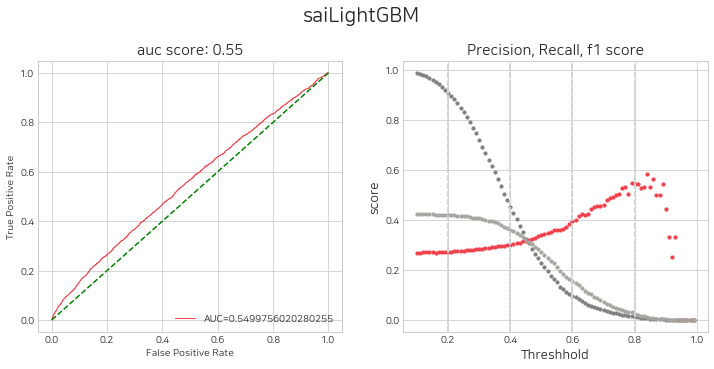

In [9]:
sai.get_eval_by_threshold(lst_trader)

### **threshold settings**
#### Referring to the visualization of the evaluation index above, the predicted probability threshold for buying stocks is set.
#### If you set it to histogram=True, it also outputs a histogram that verifies how much revenue you can earn from the validation dataset. By changing the threshold value to the lst_threshold factor, the threshold value can be determined with verified profitability.
#### For example, if the threshold is 0.8, the average rate of change at the next day's closing price for data with a prediction probability of 0.8 or higher is 2.948 so a return of 2.948 can be expected.

Error: local variable 'threshold' referenced before assignment


<Figure size 1152x720 with 0 Axes>

<Figure size 1152x720 with 0 Axes>

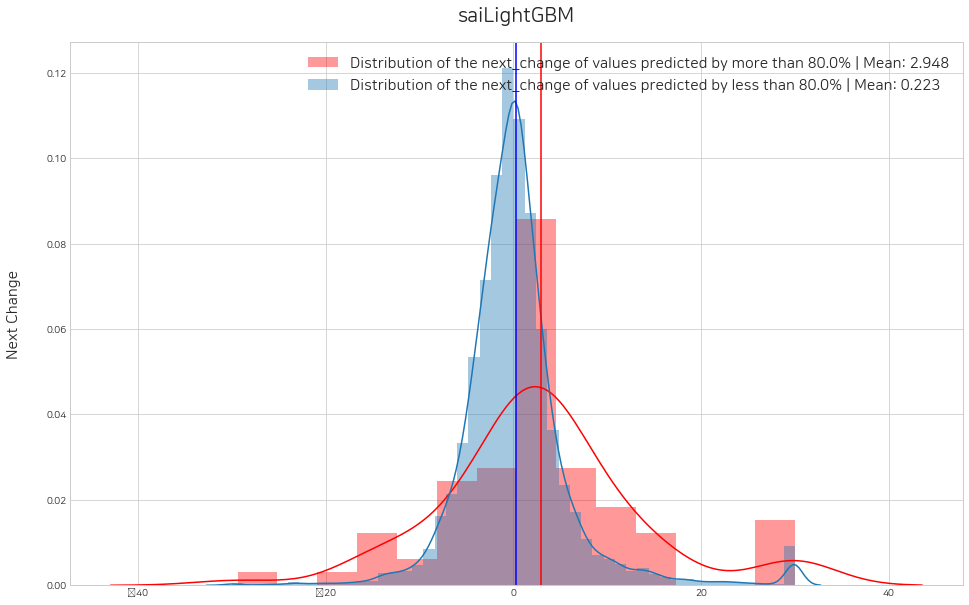

In [10]:
sai.set_threshold(lst_trader, lst_threshold=[0.8], histogram=True)

<br> 
<br> 

# **4. Back-Testing**
>1\) Making a sales log: `sai.decision(lst_trader:list, dtype='test', data=None, data_scaled=None)`  
>2) Simulation: Calculate the yield: `sai.simulation(df_signal_all, init_budget, init_stock)`  
>3) Leader Board: `sai.leaderboard(df)`   
>4) Visualize Results: `sai.yield_plot(df)`

<br> 

## **1) Making a sales log**
#### For each trader, put the trading log that generated the buying and selling records for all dates in df_signal_all.

In [11]:
df_signal_all = sai.decision(lst_trader, dtype='test')
df_signal_all

217159it [00:06, 35561.35it/s]
217159it [00:06, 35990.93it/s]


== saiLightGBM completed ==


,Trader_id,Date,Code,+(buy)/-(sell),Amount,Close
0,saiLightGBM,2021-01-04,000020,+,0.0,19100.0
1,saiLightGBM,2021-01-05,000020,+,0.0,19400.0
2,saiLightGBM,2021-01-06,000020,+,0.0,19700.0
3,saiLightGBM,2021-01-07,000020,+,0.0,19700.0
4,saiLightGBM,2021-01-08,000020,+,0.0,19100.0
...,...,...,...,...,...,...
217154,saiLightGBM,2021-12-24,009900,-,1.0,30600.0
217155,saiLightGBM,2021-12-27,009900,-,1.0,29900.0
217156,saiLightGBM,2021-12-28,009900,-,1.0,29400.0
217157,saiLightGBM,2021-12-29,009900,-,1.0,29850.0


<br> 

## **2) Simulation: Calculate the yield**
#### Calculate the return on each trader based on the trading journal **df_signal_all** obtained above.
#### Enter the initial budget in the `init_budget` factor, and put the fee in the `fee` factor.

In [12]:
df_history_all = sai.simulation(df_signal_all, init_budget=10000000, init_stock={})
df_history_all

100%|███████████████████████████████████████████████████████████████████████████████████████████████▌| 247/248 [00:07<00:00, 33.85it/s]

== saiLightGBM completed ==


,Trader_id,Sell_date,Budget,Yield,Stock
0,saiLightGBM,2021-01-04,10000000,0.000000,{}
1,saiLightGBM,2021-01-05,10000000,0.000000,{}
2,saiLightGBM,2021-01-06,10000000,0.000000,{}
3,saiLightGBM,2021-01-07,10000000,0.000000,{}
4,saiLightGBM,2021-01-08,10000000,0.000000,{}
...,...,...,...,...,...
243,saiLightGBM,2021-12-24,14442372,44.423725,{}
244,saiLightGBM,2021-12-27,14442372,44.423725,{}
245,saiLightGBM,2021-12-28,14442372,44.423725,{}
246,saiLightGBM,2021-12-29,14442372,44.423725,{}


<br> 

## **3) Leader Board**
#### You can see the leaderboard in the form of a data frame by sorting the results of the trader's returns in descending order.
#### For saiLight GBM traders, it earned a 44% return.

In [13]:
sai.leaderboard(df_history_all)

,Trader_id,Yield
0,saiLightGBM,44.423725


<br> 

## **4) Visualize Results**
#### You can see the rate-of-return visualization for all dates on the trader.

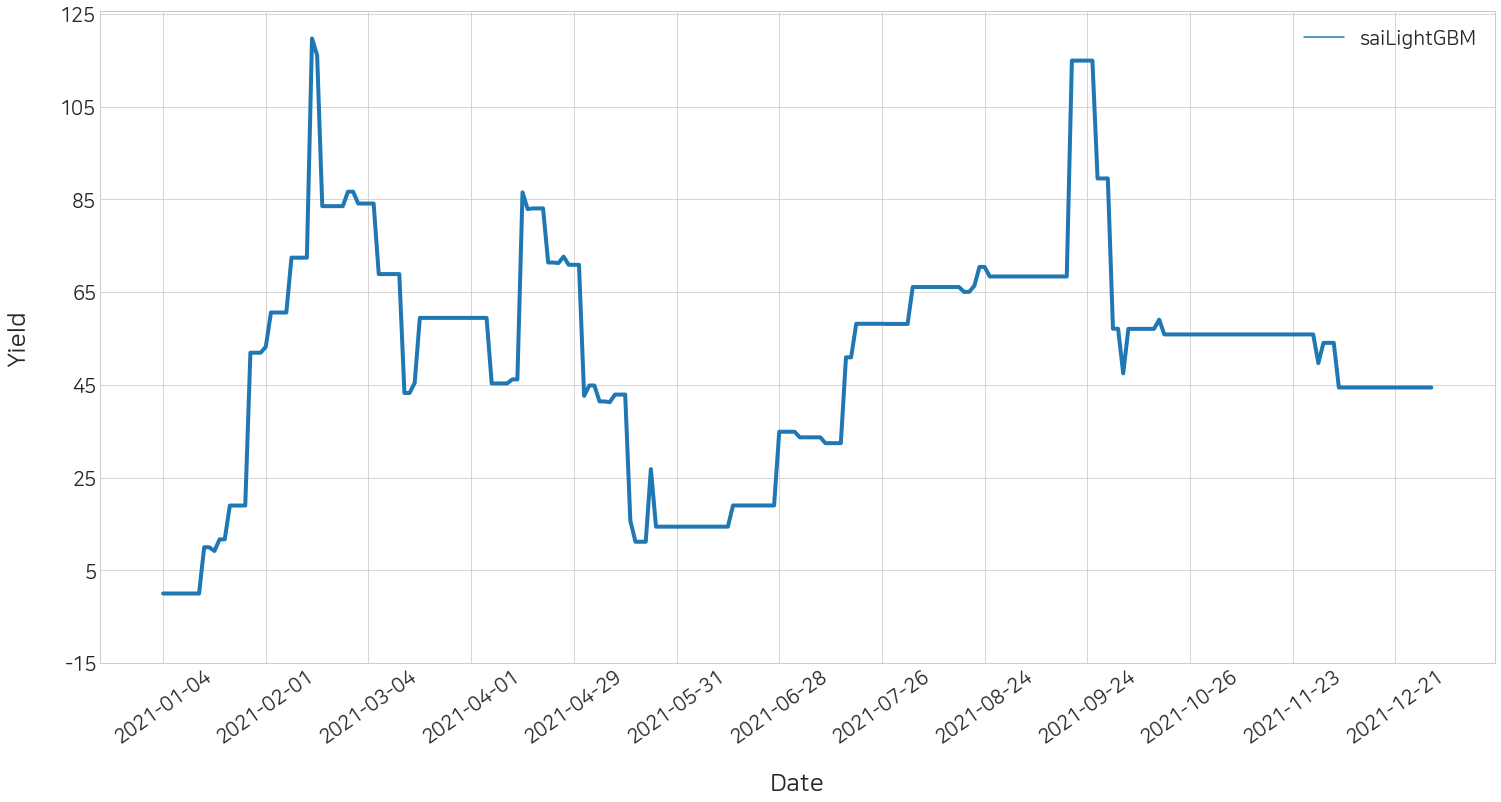

In [14]:
sai.yield_plot(df_history_all)